# 📘 Principal Component Analysis (PCA) — Aligned with Notes

Principal Component Analysis (PCA) is a **Dimensionality Reduction technique** used to handle the **Curse of Dimensionality** by **extracting important features** while preserving **maximum information (variance)**.

---

## 🔹 1. Curse of Dimensionality

As the **number of features (dimensions)** increases:

- Model performance **initially improves**
- After a point, performance **starts degrading**
- Accuracy drops due to:
  - Irrelevant features
  - Noise
  - Overfitting

### Example (from notes):
- Dataset with **500 features**
- Models trained with:
  - 3 features → low accuracy
  - 15 features → best accuracy ✅
  - 50 / 100 / 500 features → accuracy decreases ❌

📌 This phenomenon is called the **Curse of Dimensionality**.

---

## 🔹 2. Why Model Performance Degrades

When dimensionality increases:

- Distance between points becomes less meaningful
- Noise dominates useful signal
- Model learns **irrelevant patterns**
- Results in **overfitting**

📌 More features ≠ better model.

---

## 🔹 3. How to Handle Curse of Dimensionality

There are **two approaches**:

### 1️⃣ Feature Selection
- Select only **important existing features**
- Drop irrelevant features
- Example:
  - Keep `house_size`
  - Drop `fountain_size` if it doesn’t affect price

📌 Feature selection = **choosing features**

---

### 2️⃣ Dimensionality Reduction (PCA)
- Do **not drop features**
- **Transform features** into new ones
- Create **fewer, more informative features**

📌 PCA = **feature extraction**

---

## 🔹 4. Feature Selection vs Feature Extraction

| Feature Selection | Feature Extraction (PCA) |
|------------------|--------------------------|
| Drops features | Combines features |
| Keeps original meaning | New features created |
| Simple | Mathematical |
| Less powerful | Captures variance |

---

## 🔹 5. Core Idea of PCA (Geometric Intuition)

> **PCA finds a new axis such that data spread (variance) is maximum.**

- Original data may have correlated features
- PCA rotates the axes
- New axes are called **Principal Components**

---

## 🔹 6. Principal Components

- **PC1** → Direction of **maximum variance**
- **PC2** → Next maximum variance, orthogonal to PC1
- **PC3**, PC4, …

### Variance relationship:
$$
\text{Var(PC1)} > \text{Var(PC2)} > \text{Var(PC3)}
$$

📌 PC1 is the **best principal component**.

---

## 🔹 7. PCA as Dimensionality Reduction

Example:
- Original features: `house_size`, `number_of_rooms`
- Both are important → cannot drop either
- PCA combines them into **one new feature**

📌 2D → 1D  
📌 Minimal information loss  
📌 Maximum variance retained

---

## 🔹 8. Mathematical Intuition (High Level)

Steps followed in PCA:

1. **Standardize the data** (zero-centered)
2. Compute **Covariance Matrix**
3. Apply **Eigen Decomposition**
4. Identify:
   - **Eigenvectors** → directions
   - **Eigenvalues** → magnitude (variance)
5. Select eigenvector with **highest eigenvalue**

---

## 🔹 9. Eigen Vectors & Eigen Values (As in Notes)

Eigen equation:
$$
A \cdot v = \lambda \cdot v
$$

Where:
- $ A $ → Covariance matrix
- $ v $ → Eigen vector
- $ \lambda $ → Eigen value

📌 Eigen vector with **highest eigen value**  
→ **Principal Component**  
→ **Maximum variance**

---

## 🔹 10. Goal of PCA

The main goal of PCA is:

> **To find the best unit vector that captures maximum variance (spread) in data.**

- PCA1 captures maximum variance
- PCA2 captures next maximum variance
- And so on…

---

## 🎯 Final Takeaway

- PCA is a **dimensionality reduction technique**
- It solves the **curse of dimensionality**
- It performs **feature extraction**
- It preserves **maximum variance**
- It improves:
  - Model performance
  - Training speed
  - Generalization

📌 PCA transforms data, it does **not** predict.


In [ ]:
# matplotlib → used for basic plotting and visualizations
import matplotlib.pyplot as plt

# seaborn → built on top of matplotlib, used for statistical and styled visualizations
import seaborn as sns

# numpy → used for numerical operations and array/matrix computations
import numpy as np

# pandas → used for data manipulation and tabular data handling
import pandas as pd


In [4]:
# -----------------------------------------------
# Load the Breast Cancer Dataset
# -----------------------------------------------

# load_breast_cancer → built-in dataset from scikit-learn
# Commonly used for classification and PCA demonstrations
from sklearn.datasets import load_breast_cancer

# Load the dataset into a dictionary-like object
# It contains features, target labels, feature names, and description
cancer_dataset = load_breast_cancer()

# Print the full dataset description
# Shows:
# - Dataset background
# - Feature details
# - Target class information
# - Number of samples and features
print(cancer_dataset.DESCR)


.. _breast_cancer_dataset:

Breast cancer Wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [6]:
# Create a DataFrame from the Breast Cancer dataset features
# cancer_dataset['data'] → feature values
# cancer_dataset['feature_names'] → column names for each feature
breast_cancer_df = pd.DataFrame(
    cancer_dataset['data'],
    columns=cancer_dataset['feature_names']
)

# Display the first few rows of the dataset
# Helps verify data loading and understand feature structure
display(breast_cancer_df.head())


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# -----------------------------------------------
# Apply Standardization (Mandatory Before PCA)
# -----------------------------------------------

# StandardScaler → scales features so that:
# - Mean = 0
# - Standard Deviation = 1
# This ensures all features contribute equally to PCA
from sklearn.preprocessing import StandardScaler

# Create the StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the dataset
# Computes mean and standard deviation for each feature
scaler.fit(breast_cancer_df)


,copy,True
,with_mean,True
,with_std,True


In [ ]:
# Transform the original dataset using the fitted scaler
# This applies standardization so that:
# - Each feature has mean = 0
# - Each feature has standard deviation = 1
# The scaled data is now ready for PCA
scaled_data = scaler.transform(breast_cancer_df)

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]], shape=(569, 30))

In [12]:
# -----------------------------------------------
# Applying PCA (Principal Component Analysis)
# -----------------------------------------------

# Import PCA class used for dimensionality reduction
from sklearn.decomposition import PCA

# Create PCA object
# n_components=2 means:
# - Reduce the original high-dimensional data into 2 dimensions
# - The output will have exactly 2 columns:
#   → Principal Component 1 (PC1)
#   → Principal Component 2 (PC2)
# These two components capture the maximum variance in the data
pca = PCA(n_components=2)

# Apply PCA on the standardized data
# fit_transform():
# - fit() → learns the principal components (directions of max variance)
# - transform() → projects the data onto those components
# Result:
# - Rows   → same number of samples
# - Columns → 2 (PC1 and PC2)
pca_transformed_data = pca.fit_transform(scaled_data)

# Print the PCA-transformed data
# Each row now has:
# [PC1 value, PC2 value]
print(pca_transformed_data)


[[ 9.19283683  1.94858307]
 [ 2.3878018  -3.76817174]
 [ 5.73389628 -1.0751738 ]
 ...
 [ 1.25617928 -1.90229671]
 [10.37479406  1.67201011]
 [-5.4752433  -0.67063679]]


### 🔑 Key Intuition
- Original dataset → 30 features
- After PCA → 2 new features
- These 2 features are not original columns
- They are new axes capturing maximum variance

In [14]:
# -----------------------------------------------
# Explained Variance of Principal Components
# -----------------------------------------------

# explained_variance_ →
# Returns the amount of variance captured by each principal component
# Since n_components=2, this will return 2 values:
# - Variance captured by PC1
# - Variance captured by PC2
explained_variance = pca.explained_variance_

# Convert to a DataFrame for beautiful and meaningful display
explained_variance_df = pd.DataFrame(
    explained_variance,
    index=["Principal Component 1 (PC1)", "Principal Component 2 (PC2)"],
    columns=["Explained Variance"]
)

# Display the explained variance neatly
display(explained_variance_df)


,Explained Variance
Principal Component 1 (PC1),13.304991
Principal Component 2 (PC2),5.701375


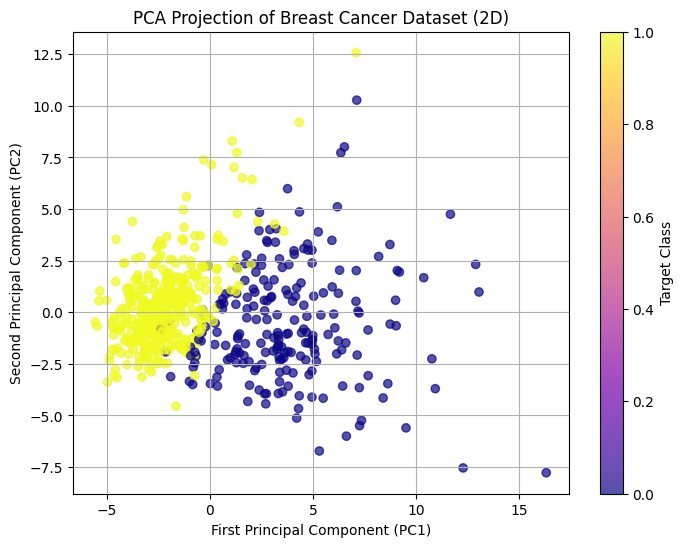

In [19]:
# -----------------------------------------------
# Visualizing PCA Result (2D Projection)
# -----------------------------------------------

# Create a figure with specified size
plt.figure(figsize=(8, 6))

# Scatter plot of PCA-transformed data
# pca_transformed_data[:, 0] → values of First Principal Component (PC1)
# pca_transformed_data[:, 1] → values of Second Principal Component (PC2)
# c → color-coded using target labels (0 = malignant, 1 = benign)
# cmap → color map used for better visual distinction
plt.scatter(
    pca_transformed_data[:, 0],
    pca_transformed_data[:, 1],
    c=cancer_dataset['target'],
    cmap='plasma',
    alpha=0.7
)

# Label the axes clearly
plt.xlabel('First Principal Component (PC1)')
plt.ylabel('Second Principal Component (PC2)')

# Add a title to explain what the plot represents
plt.title('PCA Projection of Breast Cancer Dataset (2D)')

# Add a color bar to indicate class labels
plt.colorbar(label='Target Class')

# Add grid for better readability
plt.grid(True)

# Display the plot
plt.show()


In [21]:
# -----------------------------------------------
# Train–Test Split on PCA-Transformed Data
# -----------------------------------------------

from sklearn.model_selection import train_test_split

# Split the PCA-transformed data into training and testing sets
# pca_transformed_data → features reduced to 2 principal components (PC1, PC2)
# cancer_dataset['target'] → target labels (malignant / benign)
# test_size=0.30 → 30% data for testing, 70% for training
# random_state=42 → ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(
    pca_transformed_data,
    cancer_dataset['target'],
    test_size=0.30,
    random_state=42
)


### 🔑 Important intuition (very important for PCA)
- We apply PCA first, then split
- PCA has already transformed data into:
    - PC1
    - PC2
- Train–test split now happens in this new reduced feature space
- Models will train using only 2 features instead of 30

In [22]:
# -----------------------------------------------
# Train Logistic Regression on PCA-Transformed Data
# -----------------------------------------------

from sklearn.linear_model import LogisticRegression

# Create Logistic Regression model
# max_iter is increased to ensure convergence
log_reg = LogisticRegression(max_iter=1000)

# Train the model using PCA-reduced training data
# X_train → PC1 and PC2 values
# y_train → target labels (malignant / benign)
log_reg.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [23]:
# Predict target labels for the test set
# Uses only the two principal components (PC1, PC2)
y_pred = log_reg.predict(X_test)


In [24]:
# -----------------------------------------------
# Evaluation Metrics for PCA + Logistic Regression
# -----------------------------------------------

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("🔹 Accuracy:", accuracy)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(
    cm,
    index=["Actual Malignant", "Actual Benign"],
    columns=["Predicted Malignant", "Predicted Benign"]
)

print("\n🔹 Confusion Matrix:")
display(cm_df)

# Classification report
print("\n🔹 Classification Report:")
print(classification_report(y_test, y_pred))


🔹 Accuracy: 0.9707602339181286

🔹 Confusion Matrix:


,Predicted Malignant,Predicted Benign
Actual Malignant,60,3
Actual Benign,2,106



🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        63
           1       0.97      0.98      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

